# Finding the Crime Rate in Montreal using Python


# Using the actes- criminels csv file from Google Drive where the file is saved for optimality.

In [ ]:
# Import the necessary modules
import pandas as pd
from google.colab import files

# Upload the CSV file to Colab
uploaded = files.upload()

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(next(iter(uploaded)))

KeyboardInterrupt: 

In [ ]:
# Importing the necessary module from the google.colab package
from google.colab import drive

# Mounting the Google Drive to the Colab environment
drive.mount('/content/drive')


In [ ]:
# Listing the contents of a specific directory in Google Drive
!ls /content/drive/My\ Drive/actes-criminels


datasets


**Reading the CSV file and creating a dataframe called actes_criminels_df**

In [ ]:
# Importing the pandas library and assigning it an alias 'pd'
import pandas as pd
actes_criminels_df = pd.read_csv("/content/actes-criminels.csv")

**Importing Geopandas and reading a json file named limitespdq**


In [ ]:
# Importing the geopandas library and assigning it an alias 'gpd'
import geopandas as gpd

# Adjusting the path according to your folder structure and reading a GeoJSON file into a GeoDataFrame
limitespdq = gpd.read_file("/content/limitespdq.geojson")


In [ ]:
# Save the CSV file
actes_criminels_df.to_csv("/content/actes-criminels-updated.csv", index=False)

# Save the GeoJSON file
limitespdq.to_file("/content/limitespdq-updated.geojson", driver='GeoJSON')


# **Displaying the first 5 rows of the Actes-Criminels dataset to understand the data**

In [ ]:
# Displaying the first few rows of the DataFrame 'actes_criminels_df'
actes_criminels_df.head()

,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE
0,Vol de véhicule à moteur,2018-09-13,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
1,Vol de véhicule à moteur,2018-04-30,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
2,Vol de véhicule à moteur,2018-09-01,nuit,7.0,290274.565000,5.042150e+06,-73.685928,45.519122
3,Méfait,2017-07-21,jour,21.0,NaN,NaN,NaN,NaN
4,Méfait,2017-07-29,jour,12.0,NaN,NaN,NaN,NaN


# **Calculating the top 3 prevalent crimes or offenses committed in Montreal City**

In [ ]:
# Calculating the top 3 prevalent crimes or offenses committed in Montreal City
top_3_crimes = actes_criminels_df['CATEGORIE'].value_counts().head(3)

# Printing the top 3 prevalent crimes or offenses
print("Top 3 prevalent crimes or offenses committed in Montreal City:")
print(top_3_crimes)


Top 3 prevalent crimes or offenses committed in Montreal City:
CATEGORIE
Vol dans / sur véhicule à moteur    72291
Introduction                        61107
Méfait                              53720
Name: count, dtype: int64


# **Displaying a bar graph using matplotlib to show the number of crimes categorised by the given categories**

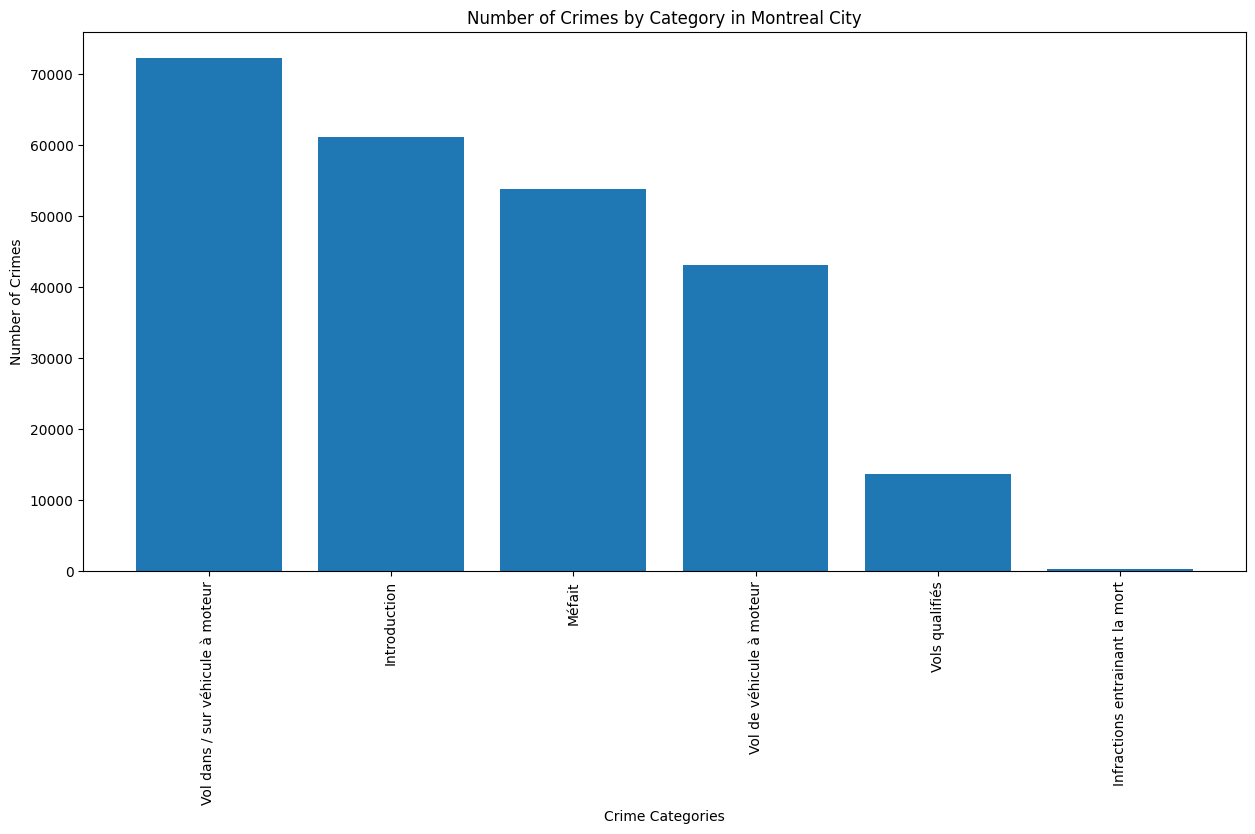

In [ ]:
# making a bar graph to show all the categories of crimes with respect to number of crimes

import matplotlib.pyplot as plt
# Grouping the DataFrame by the 'CATEGORIE' column and counting the number of occurrences
grouped_df = actes_criminels_df.groupby('CATEGORIE')['CATEGORIE'].count().reset_index(name='Count')

# Sorting the DataFrame by the 'Count' column in descending order
grouped_df = grouped_df.sort_values(by='Count', ascending=False)

# Extracting the top 30 categories with the highest number of crimes
top_30_categories = grouped_df.head(30)

# Creating a bar chart using matplotlib
plt.figure(figsize=(15, 7))
plt.bar(top_30_categories['CATEGORIE'], top_30_categories['Count'])

# Adding labels and title
plt.xlabel('Crime Categories')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Category in Montreal City')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90)

# Displaying the bar chart
plt.show()


Based on the above analysis, we can conculde that

* Theft from / on motor vehicle had registered 72291 criminal records
* Introduction (Break-in) had registered 61107 criminal records
* Méfait (Vandalism) had registered 53720 criminal records.

Hence concluding that these categories have the highest influence on criminal activities in Montreal City.

In [ ]:
# Step 4: Finding which part of the day had the most crime incidents

# Counting the occurrences of each part of the day and finding the one with the highest count
most_crime_time_of_day = actes_criminels_df['QUART'].value_counts().idxmax()

# Displaying the result
print("The part of the day with the most crime incidents:")
print(most_crime_time_of_day)


The part of the day with the most crime incidents:
jour


# Finding which part of the day had the most crime incidents using a bar graph

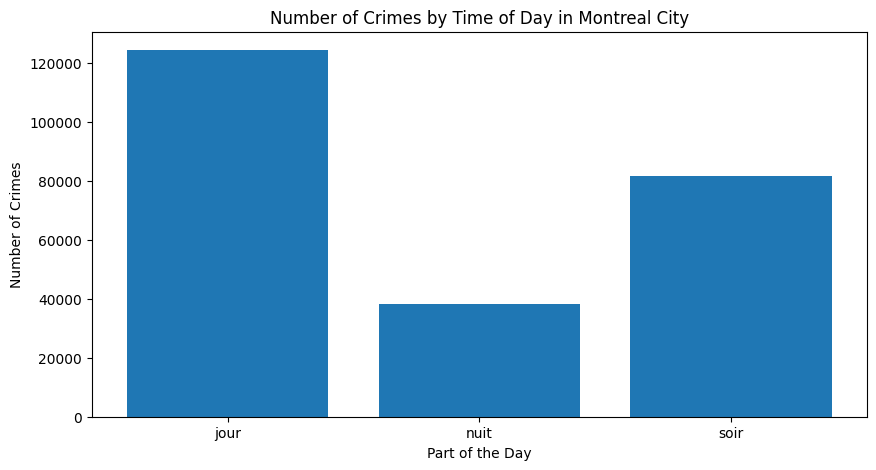

In [ ]:
#Finding which part of the day had the most crime incidents using a bar graph

import matplotlib.pyplot as plt
# Grouping the data by the 'QUART' column and counting the occurrences
grouped_by_time_of_day = actes_criminels_df.groupby('QUART')['QUART'].count().reset_index(name='Count')

# Creating a bar chart
plt.figure(figsize=(10, 5))
plt.bar(grouped_by_time_of_day['QUART'], grouped_by_time_of_day['Count'])

# Adding labels and title
plt.xlabel('Part of the Day')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Time of Day in Montreal City')

# Displaying the bar chart
plt.show()


In [ ]:
# Step 4: Find which part of the day had the most crime incidents and the count
crime_time_of_day_counts = actes_criminels_df['QUART'].value_counts()
most_crime_time_of_day = crime_time_of_day_counts.idxmax()
most_crime_count = crime_time_of_day_counts.max()

# Display the result
print("The part of the day with the most crime incidents:")
print(f"{most_crime_time_of_day}: {most_crime_count} incidents")

The part of the day with the most crime incidents:
jour: 124382 incidents


The answer for the above code tells us that most crimes occur in day time (jour) with approximately 124382 incidents.

# Top 5 Police Precinct with the most crime complaints

In [ ]:
# Step 3: Find the top 5 police precincts with the most crime complaints
top_5_pdq = actes_criminels_df['PDQ'].value_counts().head(5)
# Here we have made a new list by filtering the dataset with parameter 'PDQ' and
# used head() to display top 5 values based on value counts to give us police
# precincts with most complaints

# Display the result
print("Top 5 police precincts (PDQ) with the most crime complaints:")
print(top_5_pdq)

Top 5 police precincts (PDQ) with the most crime complaints:
PDQ
38.0    17265
21.0    14326
20.0    13593
48.0    11795
39.0    11149
Name: count, dtype: int64


# Top 3 police precincts with the least crime complaints

In [ ]:
# Step 4: Find the top 3 police precincts with the least crime complaints
least_3_pdq = actes_criminels_df['PDQ'].value_counts().tail(3)
# Here we have made a new list by filtering the dataset with parameter 'PDQ' and
# used tail() to display least 3 values based on value counts to
# give us police precincts with least complaints

# Display the result
print("Top 3 police precincts (PDQ) with the least crime complaints:")
print(least_3_pdq)

Top 3 police precincts (PDQ) with the least crime complaints:
PDQ
24.0    2532
50.0    1950
55.0      90
Name: count, dtype: int64


# Now, we will be importing the Json File to intergrate the longitude and latitudes to ascertain the neighbourhoods.

In [ ]:
# Import necessary libraries
import json

# Load the GeoJSON file
limitespdq_path = "/content/limitespdq-updated.geojson"

# Read the GeoJSON file
with open(limitespdq_path) as f:
    geojson_data = json.load(f)

# Print the GeoJSON data in a formatted way
print(json.dumps(geojson_data, indent=2))


{
  "type": "FeatureCollection",
  "crs": {
    "type": "name",
    "properties": {
      "name": "urn:ogc:def:crs:OGC:1.3:CRS84"
    }
  },
  "features": [
    {
      "type": "Feature",
      "properties": {
        "PDQ": 1,
        "NOM_PDQ": "PDQ-1"
      },
      "geometry": {
        "type": "MultiPolygon",
        "coordinates": [
          [
            [
              [
                -73.84049999993294,
                45.4569000005722
              ],
              [
                -73.84219999983907,
                45.45639999955892
              ],
              [
                -73.84040000010282,
                45.456599999219165
              ],
              [
                -73.83660000003874,
                45.45289999991655
              ],
              [
                -73.83440000005066,
                45.45069999992847
              ],
              [
                -73.83430000022054,
                45.45060000009834
              ],
              [

# **Finding the neighborhoods with the highest crime incidents and the corresponding crime types**

In [ ]:
# Import necessary libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load the CSV file
actes_criminels_path = "/content/actes-criminels-updated.csv"
actes_criminels_df = pd.read_csv(actes_criminels_path)
limitespdq_path = "/content/limitespdq-updated.geojson"
limitespdq_gdf = gpd.read_file(limitespdq_path)
# Convert the CSV data to a GeoDataFrame
geometry = [Point(xy) for xy in zip(actes_criminels_df['LONGITUDE'], actes_criminels_df['LATITUDE'])]
geo_actes_criminels_df = gpd.GeoDataFrame(actes_criminels_df, geometry=geometry)

# Ensure both GeoDataFrames have the same CRS
limitespdq_gdf = limitespdq_gdf.to_crs(epsg=4326)
geo_actes_criminels_df = geo_actes_criminels_df.set_crs(epsg=4326)

# Perform a spatial join to find the neighborhood for each crime incident
joined_gdf = gpd.sjoin(geo_actes_criminels_df, limitespdq_gdf, how="left", op="within")

# Count the number of incidents per neighborhood
neighborhood_counts = joined_gdf['NOM_PDQ'].value_counts().head(5)

# Display the top neighborhoods
print("Top neighborhoods with the highest crime incidents:")
print(neighborhood_counts)

# Get the crime types in the top neighborhoods
top_neighborhoods = joined_gdf[joined_gdf['NOM_PDQ'].isin(neighborhood_counts.index)]
crime_types_top_neighborhoods = top_neighborhoods.groupby('NOM_PDQ')['CATEGORIE'].value_counts()

# Display the crime types in the top neighborhoods
print("\nCrime types in the top neighborhoods:")
print(crime_types_top_neighborhoods)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


Top neighborhoods with the highest crime incidents:
NOM_PDQ
PDQ-38    13464
PDQ-21    10316
PDQ-48    10279
PDQ-7     10055
PDQ-26    10055
Name: count, dtype: int64

Crime types in the top neighborhoods:
NOM_PDQ  CATEGORIE                       
PDQ-21   Vol dans / sur véhicule à moteur    3781
         Méfait                              2539
         Introduction                        2372
         Vols qualifiés                       879
         Vol de véhicule à moteur             735
         Infractions entrainant la mort        10
PDQ-26   Introduction                        3181
         Méfait                              2297
         Vol dans / sur véhicule à moteur    2255
         Vol de véhicule à moteur            1708
         Vols qualifiés                       606
         Infractions entrainant la mort         8
PDQ-38   Introduction                        5843
         Méfait                              3106
         Vol dans / sur véhicule à moteur    2639
   

# Question 6: Which neighborhood has the most cases of murder?

In [ ]:
import pandas as pd

# Read the crime data from the CSV file
actes_criminels_df = pd.read_csv("/content/actes-criminels-updated.csv")

# Filtering the DataFrame to include only murder cases
murder_cases_df = actes_criminels_df[actes_criminels_df['CATEGORIE'] == 'Infractions entrainant la mort']

# Counting the number of murder cases per neighborhood
murders_by_neighborhood = murder_cases_df.value_counts('PDQ')

# Finding the neighborhood with the most cases of murder
neighborhood_with_most_murders = murders_by_neighborhood.idxmax()

# Printing the neighborhood with the most cases of murder
print("Neighborhood with the most cases of murder:", neighborhood_with_most_murders)


Neighborhood with the most cases of murder: 39.0


Here we filtered the actes-criminels dataset to include only those records where Infractions entrainant la mort (murder) were concerned.

This creation of a new dataframe is named murder_cases_df by which we counted the number of cases with the PDQ number in mind indicating that the police precinct marked as 39 has the most cases of murder.